<a href="https://colab.research.google.com/github/ferreirageovani/Projeto---Analise-Exploratoria_01/blob/main/Teste_Business_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Aqui iniciaremos com as importações das Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [15]:
# Carregamento geral das Tabelas
tabela_pesquisa_utmsn = pd.read_csv('TabelaPesquisaUTMsn - TabelaPesquisaUTMsn.csv')
tabela_vendas = pd.read_csv('TabelaVendas.csv')
tabela_pesquisa = pd.read_csv('TabelaPesquisa.csv')
tabela_ads_links = pd.read_csv('TabelaAdsLinks.csv')
tabela_ads_valor_gasto = pd.read_csv('TabelaAdsValorGasto.csv')

# Visualização de resumo geral dos registros de cada tabela
print(tabela_pesquisa_utmsn.head())
print(tabela_vendas.head())
print(tabela_pesquisa.head())
print(tabela_ads_links.head())
print(tabela_ads_valor_gasto.head())


   Unnamed: 0.1  Unnamed: 0                             email    utmsource  \
0             0           0                aassis71@gmail.com  facebookads   
1             1           1              aelionaijs@gmail.com  facebookads   
2             2           2            acorreia2019@gmail.com  facebookads   
3             3           3  29700781sp@al.educacao.sp.gov.br  facebookads   
4             4           4                   nthia@gmail.com        [BIO]   

  utmterm                                          utmmedium  
0    AD17                      2.03_lookalike_3_compras_180D  
1    AD12                   lookalike_1_compras_180D_AD12a17  
2    AD12                   lookalike_1_compras_180D_AD12a17  
3    AD17  2.03_lookalike_3_compras_180D_ADS_Campeoes_Adv...  
4   [BIO]                                              [BIO]  
   Unnamed: 0.1  Unnamed: 0                    email
0             0           0   andra_miao@hotmail.com
1             1           1             tu@gmai

In [16]:
# Garante que os e-mails estejam em minúsculas para evitar problemas de junção
tabela_pesquisa_utmsn['email'] = tabela_pesquisa_utmsn['email'].str.lower()
tabela_vendas['email'] = tabela_vendas['email'].str.lower()
tabela_pesquisa['email'] = tabela_pesquisa['email'].str.lower()

# Adiciona coluna para indicar se um lead se tornou um comprador
tabela_pesquisa_utmsn['comprou'] = tabela_pesquisa_utmsn['email'].isin(tabela_vendas['email'])

# Mescla as tabelas da pesquisa de persona com tabela de leads
tabela_completa = pd.merge(tabela_pesquisa_utmsn, tabela_pesquisa, on='email', how='left')


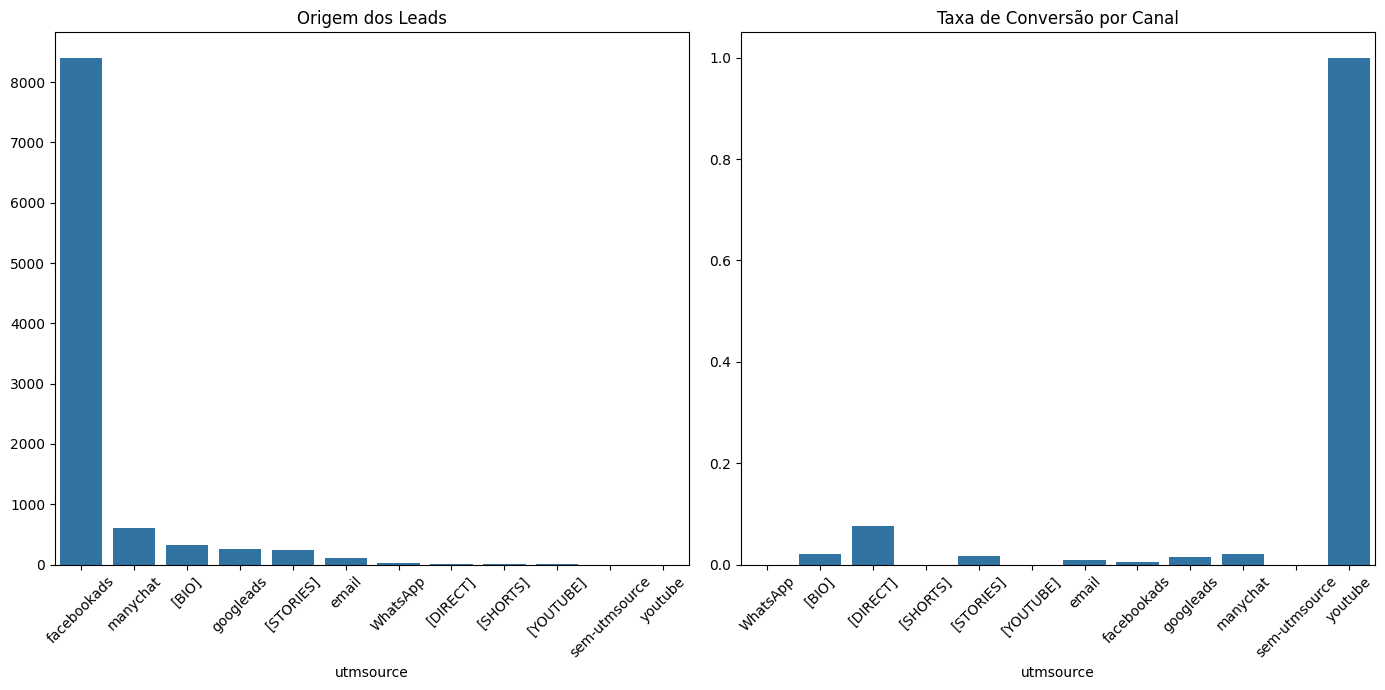

In [19]:
# Origem dos leads
leads_por_canal = tabela_pesquisa_utmsn['utmsource'].value_counts()

# Conversão por canal
conversao_por_canal = tabela_pesquisa_utmsn.groupby('utmsource')['comprou'].mean()

# Origem dos leads e conversão por canal
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=leads_por_canal.index, y=leads_por_canal.values)
plt.title('Origem dos Leads')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=conversao_por_canal.index, y=conversao_por_canal.values)
plt.title('Taxa de Conversão por Canal')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [20]:
# Total de leads e compradores
total_leads = len(tabela_pesquisa_utmsn)
total_compradores = tabela_pesquisa_utmsn['comprou'].sum()

print(f'Total de leads: {total_leads}')
print(f'Total de compradores: {total_compradores}')
print(f'Taxa de conversão geral: {total_compradores / total_leads:.2%}')

Total de leads: 9999
Total de compradores: 71
Taxa de conversão geral: 0.71%


               idade            renda tempo_me_conhece
count           1389             1389             1389
unique            10                4                5
top     41 a 45 anos  Até 1.500 reais   Menos de 1 mês
freq             266              742              855


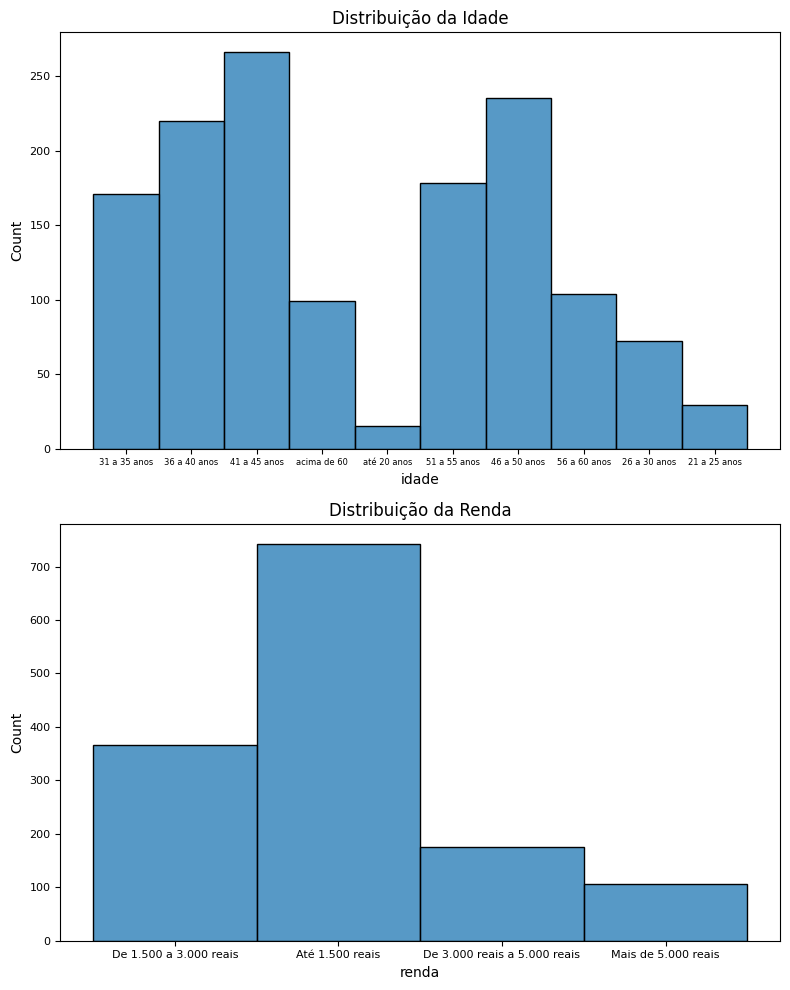

In [37]:
# Estatísticas descritivas das respostas da pesquisa de persona
print(tabela_completa[['idade', 'renda', 'tempo_me_conhece']].describe())

# Visualizar a distribuição da idade e renda
plt.figure(figsize=(8, 10)) # Adjust figure size for vertical layout

plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
sns.histplot(tabela_completa['idade'].dropna(), bins=10)
plt.title('Distribuição da Idade')
plt.xticks(fontsize=6) # Reduce x-axis label font size
plt.yticks(fontsize=8) # Reduce y-axis label font size

plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
sns.histplot(tabela_completa['renda'].dropna(), bins=10)
plt.title('Distribuição da Renda')
plt.xticks(fontsize=8) # Reduce x-axis label font size
plt.yticks(fontsize=8) # Reduce y-axis label font size

plt.tight_layout()
plt.show()


<ipython-input-31-04e6354a2474>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


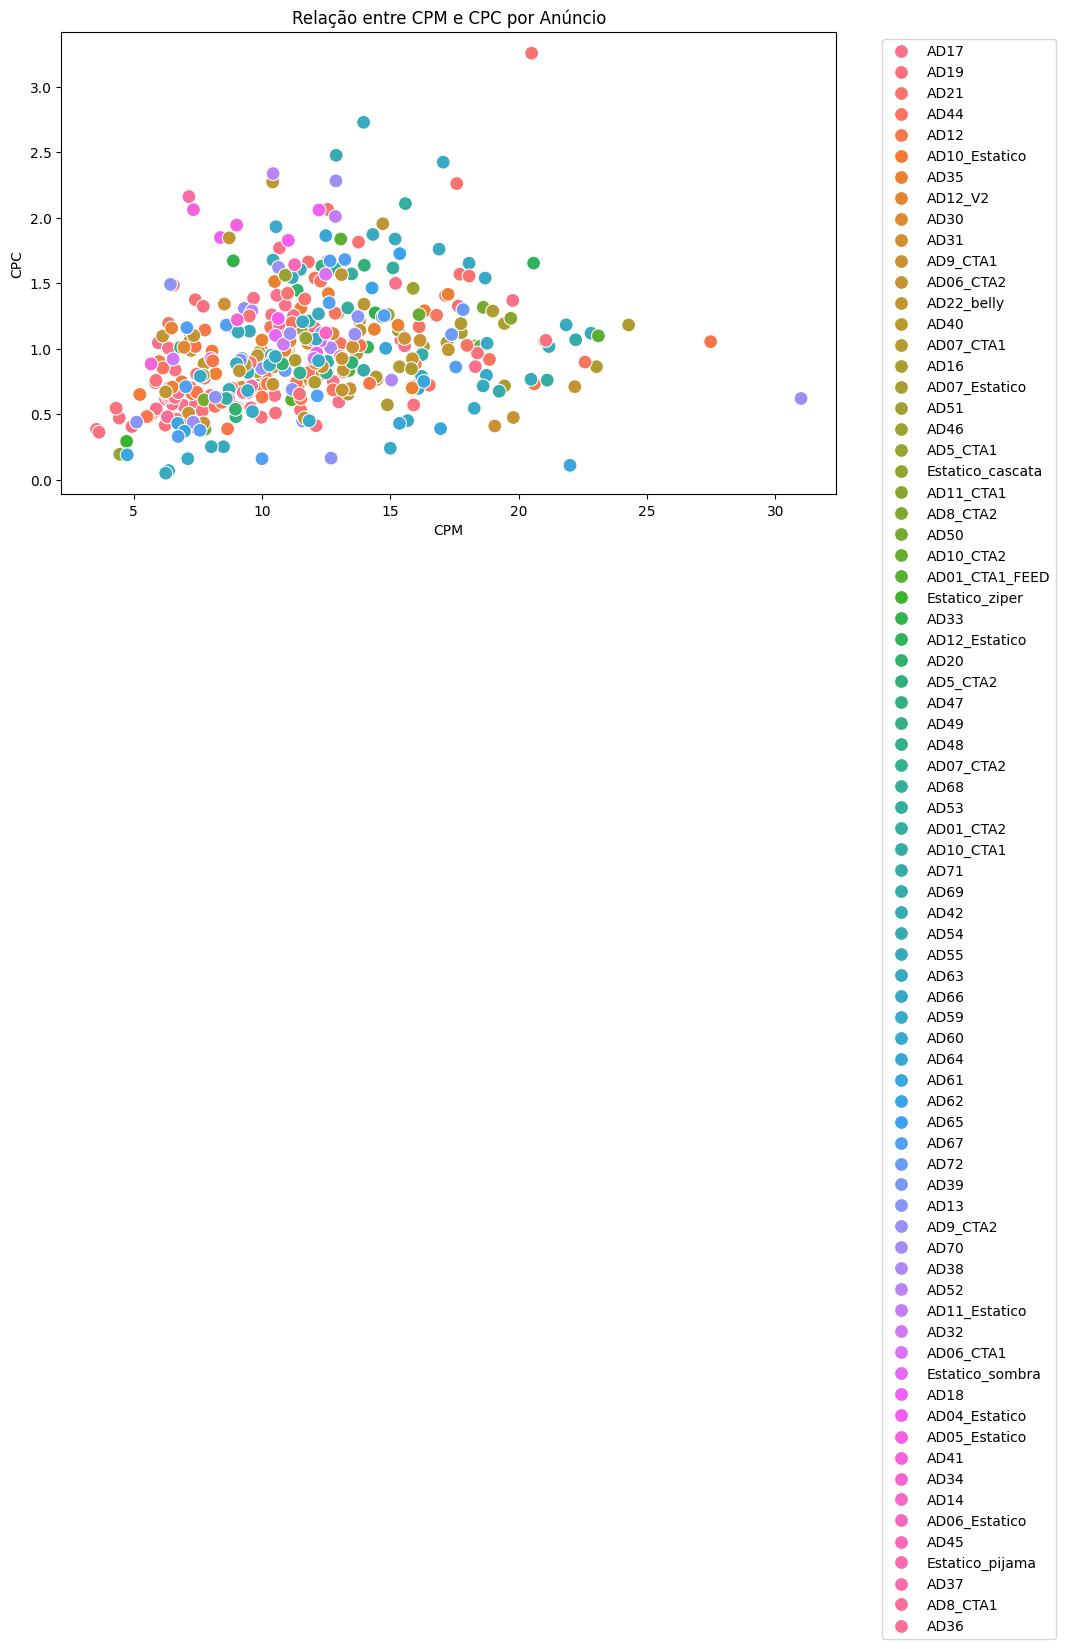

In [31]:
# Grafico de Dispersão para realizar as seguintes vertentes:
# Comparar o desempenho dos seus anúncios
# Tomar decisões estratégicas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPM (custo por 1.000 impressões)',
                y='CPC (custo por clique no link)',
                hue='Nome do anúncio',  # Diferenciar anúncios por cor
                data=tabela_ads_valor_gasto,
                s=100)  # Aumentar o tamanho dos pontos
plt.title('Relação entre CPM e CPC por Anúncio')
plt.xlabel('CPM')
plt.ylabel('CPC')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posicionar a legenda fora do gráfico
plt.tight_layout()
plt.show()

In [30]:
# Cria uma tabela dinâmica com a média do CTR por anúncio
# Mostrar um resumo das comparações
tabela_dinamica = pd.pivot_table(tabela_ads_valor_gasto,
                                values='CTR (taxa de cliques no link)',
                                index='Nome do anúncio',
                                aggfunc='mean')

print(tabela_dinamica)

                  CTR (taxa de cliques no link)
Nome do anúncio                                
AD01_CTA1_FEED                         1.616371
AD01_CTA2                              1.327978
AD04_Estatico                          0.734209
AD05_Estatico                          0.665724
AD06_CTA1                              1.085481
...                                         ...
AD9_CTA1                               1.704652
AD9_CTA2                               1.613328
Estatico_cascata                       2.303431
Estatico_sombra                        0.956023
Estatico_ziper                         1.615416

[75 rows x 1 columns]


In [39]:
# Identificar os melhores e piores canais de aquisição
melhor_canal = conversao_por_canal.idxmax()
pior_canal = conversao_por_canal.idxmin()

print(f'Melhor canal de aquisição: {melhor_canal} com taxa de conversão de {conversao_por_canal[melhor_canal]:.2%}')
print(f'Pior canal de aquisição: {pior_canal} com taxa de conversão de {conversao_por_canal[pior_canal]:.2%}')

# Analisar anúncios com melhor e pior ROI
# Calcula o ROI (assumindo que 'Valor gasto (BRL)' representa o custo e precisa ser multiplicado por -1)
tabela_ads_valor_gasto['ROI'] = (tabela_ads_valor_gasto['Valor gasto (BRL)'] * -1) / tabela_ads_valor_gasto['Valor gasto (BRL)']

# Encontra o anúncio com o melhor e pior ROI
melhor_roi_anuncio = tabela_ads_valor_gasto['ROI'].idxmax()
pior_roi_anuncio = tabela_ads_valor_gasto['ROI'].idxmin()


print(f'Anúncio com o melhor ROI: {tabela_ads_valor_gasto.loc[melhor_roi_anuncio, "Nome do anúncio"]}')
print(f'Anúncio com o pior ROI: {tabela_ads_valor_gasto.loc[pior_roi_anuncio, "Nome do anúncio"]}')


Melhor canal de aquisição: youtube com taxa de conversão de 100.00%
Pior canal de aquisição: WhatsApp com taxa de conversão de 0.00%
Anúncio com o melhor ROI: AD17
Anúncio com o pior ROI: AD17
